In [17]:
# import all required libraries
import pennylane as qml
import matplotlib.pyplot as plt
from pennylane import numpy as np
from pennylane import qchem

In [18]:
# define the molecule
symbols = ["H", "H", "H"]
coordinates = np.array([[0.0102,0.0442,0.0],[0.9867,1.6303,0.0],
                        [1.8720,-0.0085,0.0]])

In [19]:
# define the molecular hamiltonian
hamiltonian, qubits = qchem.molecular_hamiltonian(symbols,
                                                 coordinates,
                                                 charge = 1)
print ("Number of qubits needed =", qubits)
print ("The Hamiltonian is", hamiltonian)

Number of qubits needed = 6
The Hamiltonian is   (-0.29975061450095497) [I0]
+ (-0.11491204817824766) [Z4]
+ (-0.11491204817824763) [Z5]
+ (-0.11489380123622853) [Z3]
+ (-0.11489380123622847) [Z2]
+ (0.21445495423132893) [Z0]
+ (0.21445495423132893) [Z1]
+ (-1.1014770954871286e-06) [Y0 Y2]
+ (-1.1014770954871286e-06) [X0 X2]
+ (-7.657812067830838e-07) [Y2 Y4]
+ (-7.657812067830838e-07) [X2 X4]
+ (7.657715636946727e-07) [Y3 Y5]
+ (7.657715636946727e-07) [X3 X5]
+ (0.018129719621400545) [Y1 Y3]
+ (0.018129719621400545) [X1 X3]
+ (0.10696109578713542) [Z0 Z2]
+ (0.10696109578713542) [Z1 Z3]
+ (0.10696270053346385) [Z0 Z4]
+ (0.10696270053346385) [Z1 Z5]
+ (0.10724024533219191) [Z2 Z4]
+ (0.10724024533219191) [Z3 Z5]
+ (0.12610803034983684) [Z2 Z5]
+ (0.12610803034983684) [Z3 Z4]
+ (0.14296074155484034) [Z0 Z3]
+ (0.14296074155484034) [Z1 Z2]
+ (0.14296240010224587) [Z0 Z5]
+ (0.14296240010224587) [Z1 Z4]
+ (0.14703116579240524) [Z0 Z1]
+ (0.1638437446033697) [Z2 Z3]
+ (0.16384447520760734

In [20]:
# determine the hartree-fock state
hf = qchem.hf_state(electrons = 2, orbitals = 6)
print (hf)

[1 1 0 0 0 0]


In [21]:
# calculate the expectation value
num_wires = qubits 
dev = qml.device("default.qubit", wires=num_wires)

In [22]:
@qml.qnode(dev)
def exp_energy(state):
    qml.BasisState(np.array(state), wires=range(num_wires))
    return qml.expval(hamiltonian)

In [23]:
exp_energy(hf)

tensor(-1.24655016, requires_grad=True)

In [24]:
# de-excite electrons through double excitation gates
def ansatz(params):
    qml.BasisState(hf,wires=range(num_wires))
    qml.DoubleExcitation(params[0], wires=[0,1,2,3])
    qml.DoubleExcitation(params[1],wires=[0,1,4,5])

In [25]:
# minimize the hamiltonian value using ritz variational principle
@qml.qnode(dev)
def cost_function(params):
    ansatz(params)
    return qml.expval(hamiltonian)

In [26]:
cost_function([0.1,0.1])

tensor(-1.26796721, requires_grad=True)

In [27]:
# optimize our cost function circuit to find ground-state
opt = qml.GradientDescentOptimizer(stepsize=0.4)
theta = np.array([0.0,0.0], requires_grad = True)

energy = [cost_function(theta)]
angle = [theta]
max_iterations = 20

for n in range(max_iterations):
    theta, prev_energy = opt.step_and_cost(cost_function, theta)
    
    energy.append(cost_function(theta))
    angle.append(theta)
    
    if n%2 == 0:
        print (f"Step = {n}, Energy = {energy[-1]:.8f} Ha")

Step = 0, Energy = -1.26070025 Ha
Step = 2, Energy = -1.27115671 Ha
Step = 4, Energy = -1.27365804 Ha
Step = 6, Energy = -1.27425241 Ha
Step = 8, Energy = -1.27439362 Ha
Step = 10, Energy = -1.27442718 Ha
Step = 12, Energy = -1.27443517 Ha
Step = 14, Energy = -1.27443707 Ha
Step = 16, Energy = -1.27443752 Ha
Step = 18, Energy = -1.27443763 Ha


In [28]:
# output the ground-state and the optimizing parameters
print ("\n" f"Final ground energy: {energy[-1]: .8f} Ha")
print ("\n" f"Final angle parameters: {theta[0]: .8f} {theta[1]: .8f}")


Final ground energy: -1.27443764 Ha

Final angle parameters:  0.19203468  0.19290335


In [29]:
# determine the actual ground-state
@qml.qnode(dev)
def ground_state(params):
    ansatz(params)
    return qml.state()
ground_state(theta)

tensor([ 0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.09585862+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.09586987+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.99076743+0.j,  0.        +0.j,  0.        +0.

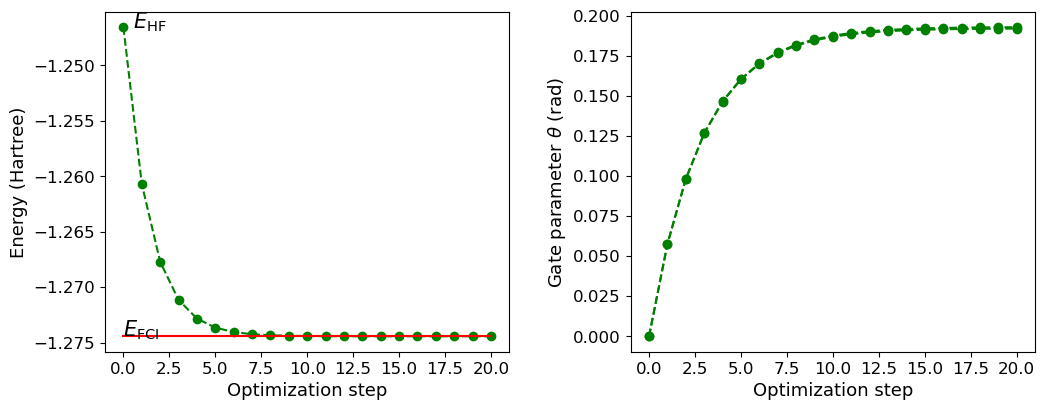

In [30]:
# form a graphical representation with the ground state plotted
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)

# full configuration interaction energy computed classically
E_fci = -1.27443763

# add energy plot on column 1
ax1 = fig.add_subplot(121)
ax1.plot(range(n + 2), energy, "go", ls="dashed")
ax1.plot(range(n + 2), np.full(n + 2, E_fci), color="red")
ax1.set_xlabel("Optimization step", fontsize=13)
ax1.set_ylabel("Energy (Hartree)", fontsize=13)
ax1.text(0.5, -1.2466, r"$E_\mathrm{HF}$", fontsize=15)
ax1.text(0, -1.2744, r"$E_\mathrm{FCI}$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add angle plot on column 2
ax2 = fig.add_subplot(122)
ax2.plot(range(n + 2), angle, "go", ls="dashed")
ax2.set_xlabel("Optimization step", fontsize=13)
ax2.set_ylabel("Gate parameter $\\theta$ (rad)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(wspace=0.3, bottom=0.2)
plt.show()